In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
# Loading CIFAR-10 dataset 
(train_images,train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 136s 1us/step


In [3]:
print(f'Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}')
print(f'Testing data shape: {test_images.shape}, Testing labels shape: {test_labels.shape}')

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3), Testing labels shape: (10000, 1)


In [4]:
# Defining class names for classification
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

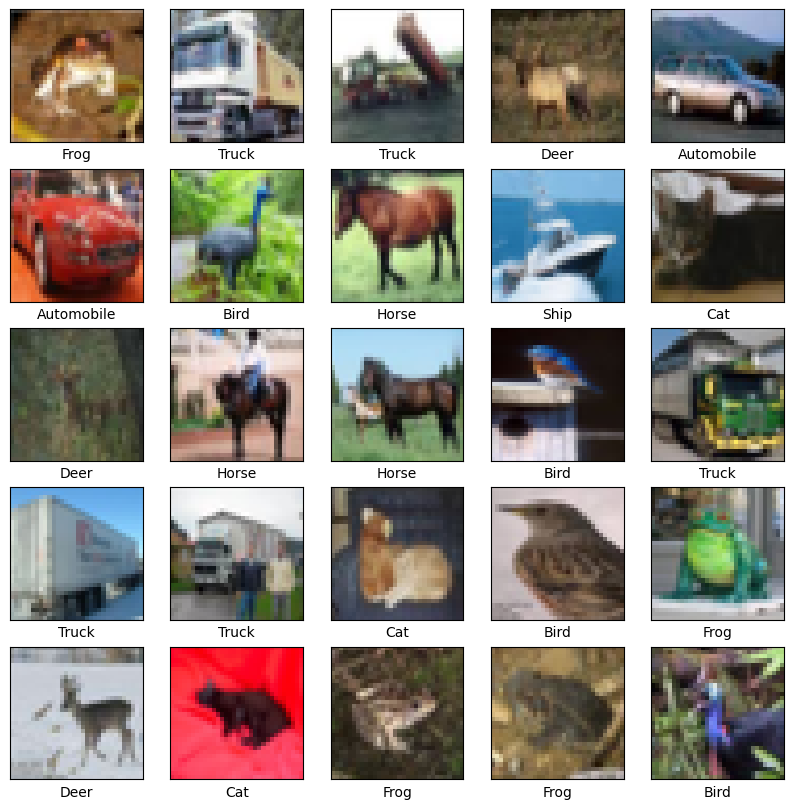

In [7]:
# Visualizing some samples
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays which is why you need extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
# Normalizing the Image Data
# Pixel values range from 0 to 255 , we normalize them to range [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
# Converting labels to one hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# Data Augmentation
# It helps in improving model generalization by creating modified version of images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range= 15,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    horizontal_flip= True,
    )
datagen.fit(train_images)

In [11]:
# Splitting Training data into Training and Validation sets 

from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size= 0.2, random_state= 42)

In [21]:
# Defining the CNN Architecture 

model = models.Sequential()

# First Convolution block
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape= (32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Second convolution block
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Third convolution block
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\Darshan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [23]:
# Compiling the model
# Choosing Loss function, optimizer and metrics

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# We choose this for multi-class classification

In [24]:
print(model.optimizer)

In [25]:
# Training the model
# Define Training Parameters:
# Batch Size: Number of samples processed before the model is updated.
# Epochs: Number of complete passes through the training dataset.
# Callbacks: Tools like ModelCheckpoint and EarlyStopping to improve training.

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Defining Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience= 10, restore_best_weights= True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only= True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor= 0.5, patience= 5, min_lr= 1e-6)

In [20]:
# Train the model

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs= 100,
                    validation_data = (val_images, val_labels),
                    callbacks= [early_stop, checkpoint, reduce_lr])

Epoch 1/100


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_1/max_pooling2d_2_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_1/batch_normalization_5_1/batchnorm/add_1)' with input shapes: [?,1,1,128].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [26]:
# We received an error due to the condition that maxpooling cannot reduce dimensions from 2x2 to 1x1 
'''Input Image: 32x32x3
After First Conv2D (32 filters): 30x30x32
After Second Conv2D (32 filters): 28x28x32
After First MaxPooling2D: 14x14x32
After Third Conv2D (64 filters): 12x12x64
After Fourth Conv2D (64 filters): 10x10x64
After Second MaxPooling2D: 5x5x64
After Fifth Conv2D (128 filters): 3x3x128
After Sixth Conv2D (128 filters): 1x1x128
After Third MaxPooling2D: Error occurs here (attempting to pool 2x2 on 1x1)
'''

'Input Image: 32x32x3\nAfter First Conv2D (32 filters): 30x30x32\nAfter Second Conv2D (32 filters): 28x28x32\nAfter First MaxPooling2D: 14x14x32\nAfter Third Conv2D (64 filters): 12x12x64\nAfter Fourth Conv2D (64 filters): 10x10x64\nAfter Second MaxPooling2D: 5x5x64\nAfter Fifth Conv2D (128 filters): 3x3x128\nAfter Sixth Conv2D (128 filters): 1x1x128\nAfter Third MaxPooling2D: Error occurs here (attempting to pool 2x2 on 1x1)\n'

In [27]:
# So to fix this error we added padding='Same' in all our convolution layers
# Lets try again

In [28]:
# Train the model

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs= 100,
                    validation_data = (val_images, val_labels),
                    callbacks= [early_stop, checkpoint, reduce_lr])

Epoch 1/100


C:\Users\Darshan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 208ms/step - accuracy: 0.3304 - loss: 2.1848 - val_accuracy: 0.5681 - val_loss: 1.1995 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 190ms/step - accuracy: 0.5307 - loss: 1.3208 - val_accuracy: 0.5687 - val_loss: 1.2428 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 191ms/step - accuracy: 0.6121 - loss: 1.1008 - val_accuracy: 0.5687 - val_loss: 1.3480 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.6613 - loss: 0.9592 - val_accuracy: 0.6432 - val_loss: 1.1281 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0.6809 - loss: 0.9033 - val_accuracy: 0.6882 - val_loss: 0.9218 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 190ms/step - accuracy: 0.7082 - loss: 0.8315 - val_accuracy: 0.7502 - val_loss: 0.7240 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0

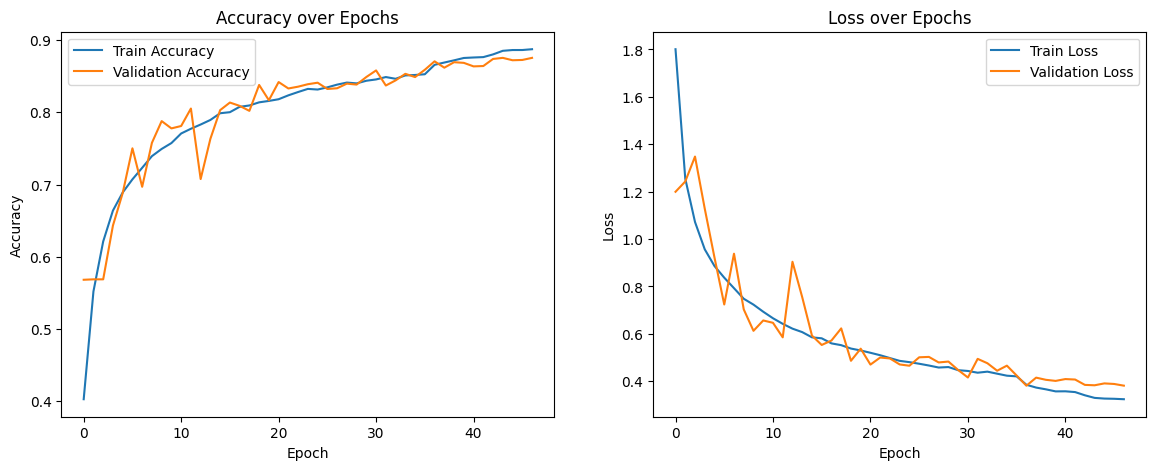

In [30]:
# Plotting the Training and Validation metrics

plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label= 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label= 'Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



In [31]:
# Evaluating the model 

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 - 9s - 28ms/step - accuracy: 0.8681 - loss: 0.3928

Test Accuracy: 0.8681


In [32]:
# Generating Predictions

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step


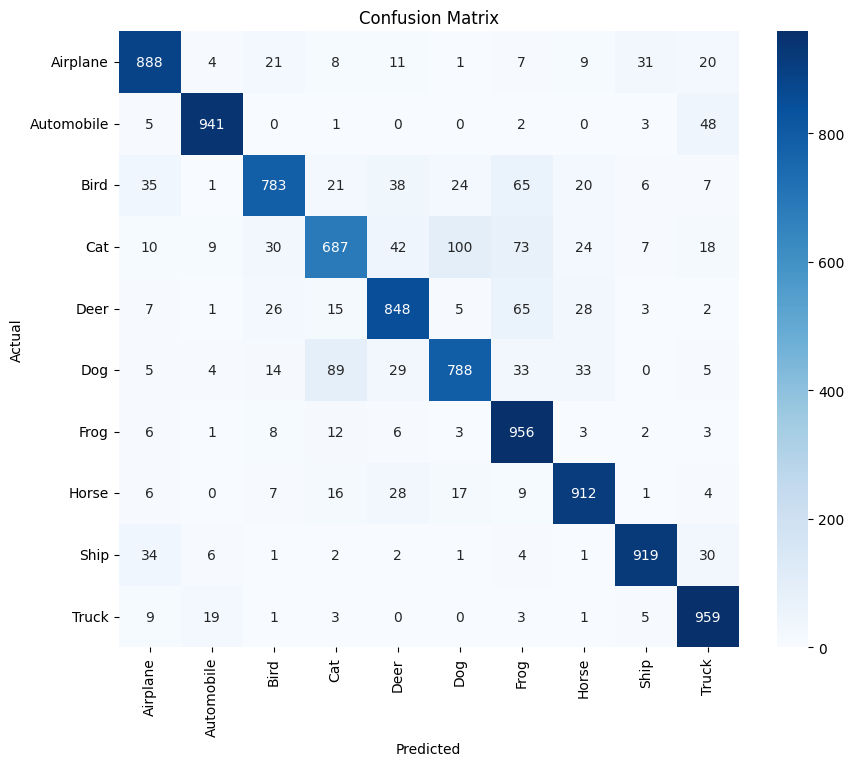

In [33]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Classification Report

print(classification_report(true_classes, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

    Airplane       0.88      0.89      0.89      1000
  Automobile       0.95      0.94      0.95      1000
        Bird       0.88      0.78      0.83      1000
         Cat       0.80      0.69      0.74      1000
        Deer       0.84      0.85      0.85      1000
         Dog       0.84      0.79      0.81      1000
        Frog       0.79      0.96      0.86      1000
       Horse       0.88      0.91      0.90      1000
        Ship       0.94      0.92      0.93      1000
       Truck       0.88      0.96      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [37]:
# Let's save our model

model.save('cnn_cifar10_model.keras')


In [38]:
# Loading the saved model

from tensorflow.keras.models import load_model

model = load_model('cnn_cifar10_model.keras')

C:\Users\Darshan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [39]:
# Let's try to deploy the model using flask

# We create app.py

from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

app = Flask(__name__)

# Loading the trained model
model = load_model('cnn_cifar10_model.keras')

# Defining class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

@app.route('/predict', methods=['POST'])

def predict():
    img = request.files['image']
    img = image.load_img(img, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    return jsonify({'predicted class': predicted_class, 'confidence': float(confidence)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


C:\Users\Darshan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

C:\Users\Darshan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
